In [54]:
# Starting a Thread
# Source: realpython.com

import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)
    
if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    logging.info("Main : before creating thread")
    x = threading.Thread(target=thread_function, args= (1,))
    logging.info("Main : before running thread")
    x.start()
    logging.info("Main: wait for the thread to finish")
    x.join()
    logging.info("Main: all done")

12:45:05: Main : before creating thread
12:45:05: Main : before running thread
12:45:05: Thread 1: starting
12:45:05: Main: wait for the thread to finish
12:45:07: Thread 1: finishing
12:45:07: Main: all done


In [26]:
# Working with many threads
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    time.sleep(2)
    logging.info("Thread %s: finishing", name)
    
if __name__ == "__main__":
    format = "%%Iasctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    threads = list()
    for index in range(3):
        logging.info("Main: create and start thread %d.", index)
        x = threading.Thread(target=thread_function, args=(index,))
        threads.append(x)
        x.start()
    for index, thread in enumerate(threads):
        logging.info("Main: before joining thread %d.", index)
        thread.join()
        logging.info("Main: thread %d done", index)

11:23:50: Main: create and start thread 0.
11:23:50: Thread 0: starting
11:23:50: Main: create and start thread 1.
11:23:50: Thread 1: starting
11:23:50: Main: create and start thread 2.
11:23:50: Thread 2: starting
11:23:50: Main: before joining thread 0.
11:23:52: Thread 0: finishing
11:23:52: Thread 1: finishing
11:23:52: Main: thread 0 done
11:23:52: Main: before joining thread 1.
11:23:52: Main: thread 1 done
11:23:52: Main: before joining thread 2.
11:23:52: Thread 2: finishing
11:23:52: Main: thread 2 done


In [27]:
# Using a ThreadPoolExecutor
import concurrent.futures

if __name__ == "__main__":
    format = "%(asctime)s: $(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:
        executor.map(thread_function, range(3))
        

11:57:47: Thread 0: starting
11:57:47: Thread 1: starting
11:57:47: Thread 2: starting
11:57:49: Thread 0: finishing
11:57:49: Thread 1: finishing
11:57:49: Thread 2: finishing


In [29]:
# Race condition (in threading)
class FakeDatabase:
    def __init__(self):
        self.value = 0
        
    def update(self, name):
        logging.info("Thread %s: starting update", name)
        local_copy = self.value
        local_copy += 1
        time.sleep(0.1)
        self.value = local_copy
        logging.info("Thread %s: finishing update", name)
    
if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    database = FakeDatabase()
    logging.info("Testing update. Starting value is %d.", database.value)
    with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
        for index in range(2):
            executor.submit(database.update, index)
    logging.info("Testing update. Ending value is %d.", database.value)

12:56:48: Testing update. Starting value is 0.
12:56:48: Thread 0: starting update
12:56:48: Thread 1: starting update
12:56:48: Thread 0: finishing update
12:56:48: Thread 1: finishing update
12:56:48: Testing update. Ending value is 1.


In [35]:
# Race condition (threading) adding Lock
class FakeDatabase:
    def __init__(self):
        self.value = 0
        self._lock = threading.Lock()
        
    def locked_update(self, name):
        logging.info("Thread %s: starting update", name)
        logging.debug("Thread %s about to lock", name)
        with self._lock:
            logging.debug("Thread %s has lock", name)
            local_copy = self.value
            local_copy += 1
            time.sleep(0.1)
            self.value = local_copy
            logging.debug("Thread %s about to release lock", name)
        logging.debug("Thread %s after release", name)
        logging.info("Thread %s: finishing update", name)

logging.getLogger().setLevel(logging.DEBUG)


In [22]:
# Producer-consumer threading
# Source: realpython.com
# The general design is that there is a producer thread that reads
# from the fake network and puts the message into a Pipeline:

import random

SENTINEL = object()

def producer(pipeline):
    """Pretending we are getting a message from the network."""
    for index in range(10):
        message = random.randint(1, 101)
        logging.info("Producer got message: %s", message)
        pipeline.set_message(message, "Producer")
        
    """Send a sentinel message to tell consumer we are done"""
    pipeline.set_message(SENTINEL, "Producer")

In [23]:
def consumer(pipeline):
    """Pretending we are saving a number in the database."""
    message = 0
    while message is not SENTINEL:
        message = pipeline.get_message("Consumer")
        if message is not SENTINEL:
            logging.info("Consumer storing message: %s", message)

In [51]:
import concurrent.futures

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    #Logging.getLogger().setLevel(logging.DEBUG)
    
    
from sklearn.pipeline import Pipeline
# The sequence of pipe flow is :
# PCA dimension is reduced by 2 >> Data gets scaled >> Classification of decission tree
pipeline = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
    #pipeline = Pipeline()
with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
    executor.submit(producer, pipeline)
    executor.submit(consumer, pipeline)

12:35:27: Producer got message: 32


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

Class Pipeline:
    """
    Class to allow a single element pipeline between producer and consumer.
    """
    def __init__(self):
        self.message = 0
        self.producer_lock = threading.Lock()
        self.consumer_lock = threading.Lock()
        self.consumer_lock.acquire()
    
    def get_message(self, name):
        logging.debug("%s:about to acquire getlock", name)
        self.consumer_lock.acquire()
        logging.debug("%s:have getlock", name)
        message = self.message
        logging.debug("%s:about to release setlock", name)
        self.producer_lock.release()
        logging.debug("%s:setlock released", name)
        return message
    
    def set_message(self, message, name):
        logging.debug("%s:about to acquire setlock", name)
        self.producer_lock.acquire()
        logging.debug("%s:have setlock", name)
        self.message = message
        logging.debug("%s:about to release getlock", name)
        self.consumer_lock.release()
        logging.debug("%s:getlock released", name)

SyntaxError: invalid syntax (3231028963.py, line 4)

In [50]:
# Souce: askpython.com/python

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Create pipeline: loading data
url_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
varnames = ['var_preg', 'var_plas', 'var_pres', 'var_skin', 'var_test', 'var_mass', 'var_pedi', 'var_age', 'var_class']
vardataframe = read_csv(url_data, names=varnames)
vararray = vardataframe.values
varX = vararray[:,0:8]
varY = vararray[:,8]

In [41]:
# Creating pipelines 
urlfeatures = []
urlfeatures.append(('pca', PCA(n_components=3)))
urlfeatures.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(urlfeatures)
# Here, pipeline is created
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# The pipelie is tested here
seed = 7
varkfold = KFold(n_splits=10)
dataresults = cross_val_score(model, varX, varY, cv=varkfold)
print(dataresults.mean())


/Users/weinazhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/weinazhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.7760423786739576


/Users/weinazhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# Another pipeline example: iris database, 50% data loaded for testing
# Source: askpython.com/python

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

# database is imported from inbuilt sklearn datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
#The data spliting is executed here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
# The sequence of pipe flow is :
# PCA dimension is reduced by 2 >> Data gets scaled >> Classification of decission tree
pipe = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
 
# fitting the data in the pipeline
pipe.fit(X_train, y_train)
 
# scoring data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s
0.9733333333333334


In [67]:
# Source: realpython.com
# Producer-Consumer Using Queue

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    # logging.getLogger().setLevel(logging.DEBUG)
    
# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline
# The sequence of pipe flow is :
# PCA dimension is reduced by 2 >> Data gets scaled >> Classification of decission tree
pipeline = Pipeline([('pca', PCA(n_components = 2)), ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
  
event = threading.Event()
with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
    executor.submit(producer, pipeline, event)
    executor.submit(consumer, pipeline, event)
        
    time.sleep(0.1)
    logging.info("Main: about to set event")
    event.set()

15:01:54: Producer got message: 23
15:01:54: Main: about to set event


In [71]:
# Producer-Consumer Using Queue (Cont'd)
# Source: realpython.com
# but bellow codes do not produce output

def producer(pipeline, event):
    """Pretend we are getting a number from the network."""
    while not event.is_set():
        message = random.randint(1,101)
        logging.info("Producer got message: %s", message)
        pipeline.set_message(message, "Producer")
    logging.info("Producer received EXIT event.Exiting")
    
def consumer(pipeline, event):
    """Pretend we are saving a number in the database."""
    while not event.is_set() or not pipeline.empty():
        message = pipeline.get_message("Consumer")
        logging.info("Consumer storing message: %s (queue size=%s)",\
                     message, pipeline.qsize())
        logging.info("Consumer received EXIT event. Exiting")

class Pipeline(queue.Queue):
    def __init__(self):
        super().__init__(maxsize=10)

    def get_message(self, name):
        logging.debug("%s:about to get from queue", name)
        value = self.get()
        logging.debug("%s:got %d from queue", name, value)
        return value

    def set_message(self, value, name):
        logging.debug("%s:about to add %d to queue", name, value)
        self.put(value)
        logging.debug("%s:added %d to queue", name, value)

In [72]:
# A Simplified Producer-Consumer Using Queue
# Source: realpython.com

import concurrent.futures
import logging
import queue
import random
import threading
import time

def producer(queue, event):
    """Pretend we're getting a number from the network."""
    while not event.is_set():
        message = random.randint(1, 101)
        logging.info("Producer got message: %s", message)
        queue.put(message)

    logging.info("Producer received event. Exiting")

def consumer(queue, event):
    """Pretend we're saving a number in the database."""
    while not event.is_set() or not queue.empty():
        message = queue.get()
        logging.info(
            "Consumer storing message: %s (size=%d)", message, queue.qsize()
        )

    logging.info("Consumer received event. Exiting")

if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")

    pipeline = queue.Queue(maxsize=10)
    event = threading.Event()
    with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(producer, pipeline, event)
        executor.submit(consumer, pipeline, event)

        time.sleep(0.1)
        logging.info("Main: about to set event")
        event.set()

15:13:57: Producer got message: 83
15:13:57: Producer got message: 4
15:13:57: Consumer storing message: 83 (size=0)
15:13:57: Consumer storing message: 4 (size=0)
15:13:57: Producer got message: 97
15:13:57: Producer got message: 46
15:13:57: Consumer storing message: 97 (size=0)
15:13:57: Producer got message: 84
15:13:57: Producer got message: 14
15:13:57: Producer got message: 10
15:13:57: Consumer storing message: 46 (size=0)
15:13:57: Producer got message: 5
15:13:57: Producer got message: 64
15:13:57: Consumer storing message: 84 (size=2)
15:13:57: Consumer storing message: 14 (size=3)
15:13:57: Producer got message: 83
15:13:57: Consumer storing message: 10 (size=2)
15:13:57: Producer got message: 71
15:13:57: Producer got message: 28
15:13:57: Producer got message: 71
15:13:57: Consumer storing message: 5 (size=2)
15:13:57: Producer got message: 44
15:13:57: Consumer storing message: 64 (size=4)
15:13:57: Consumer storing message: 83 (size=4)
15:13:57: Producer got message: 56

Best parameter (CV score=0.924):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


/Users/weinazhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


Text(0.5, 0, 'n_components')

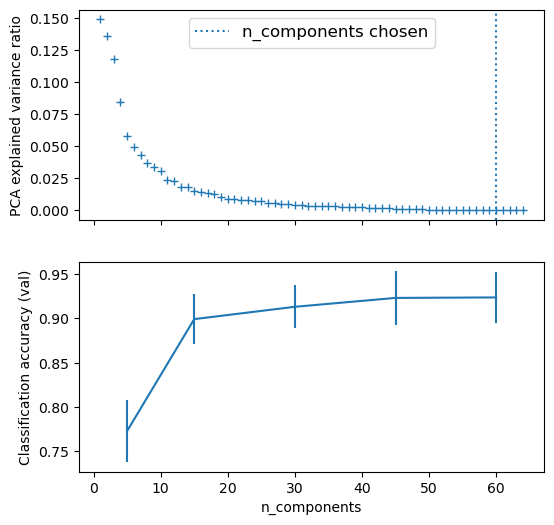

In [69]:
# pipeline, PCA example
# Source: scikit-learn.org

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)
# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")


In [70]:
# Source: nirpyresearch.com
# Principal Component Regression (PCR)
# 2 Steps: PCA and Linear Regression example

import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Read data
url = 'https://raw.githubusercontent.com/nevernervous78/nirpyresearch/master/data/peach_spectra_brix.csv'
data = pd.read_csv(url)

# Define arrays
X = data.values[:,1:].astype("float32")
y = data["Brix"].values.astype("float32")
# Calculate first derivative
X1 = savgol_filter(X, 21, polyorder = 2, deriv=1)

pcr_pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA() ), ('linear_regression', LinearRegression())])

# Define the parameter to vary. Here's the number of PC
parameters = {'pca__n_components':np.arange(1,31,1)}
 
# Use GridSearchCV to find the optimal parameter(s) in cross-validation
pcr = GridSearchCV(pcr_pipe, parameters, scoring = 'neg_mean_squared_error')
# Fit the instance
pcr.fit(X1, y)
# Print the result
print(pcr.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('linear_regression', LinearRegression())])
pcr.best_estimator_.fit(X1,y)

from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import MinMaxScaler
# Define the parameter to vary. Here's the number of PC
parameters_pls = {'pls__n_components':np.arange(1,16,1)}
plsr_pipe = Pipeline([('scaler', MinMaxScaler()), ('pls', PLSRegression())])
 
plsr = GridSearchCV(plsr_pipe, parameters_pls, scoring = 'neg_mean_squared_error')
plsr.fit(X1, y)
print(plsr.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('linear_regression', LinearRegression())])
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pls', PLSRegression(n_components=3))])
